# **Spam Classification Pipeline with Whisper ASR**

Features:
- Complete data preprocessing pipeline
- Naive Bayes classifier training
- Whisper ASR integration for audio input
- Comprehensive performance analysis

In [ ]:
!pip install pandas scikit-learn nltk matplotlib seaborn openai-whisper #for data processing, ML, and audio transcription
!sudo apt install ffmpeg #for processing audio/video files with Whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 14.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s e

In [ ]:
!whisper "/content/WhatsApp Audio 2025-04-18 at 4.33.50 PM (1).mp4" --model medium  #Note: Put your audio file here
#uses Whisper to transcribe the audio file into text for further analysis

Detecting language using up to the first 30 seconds. Use `--language` to specify the language
Detected language: English
[00:00.000 --> 00:07.000]  Hello. You are the winner of a free iPhone prize.
[00:07.000 --> 00:14.000]  Click on the link below to receive your prize within 10 minutes before the deal ends.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


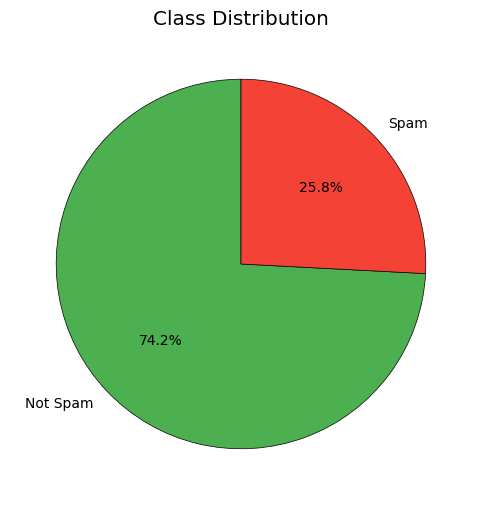


Model Performance:
Accuracy: 0.9826
Precision: 1.0000
Recall: 0.9333
F1 Score: 0.9655


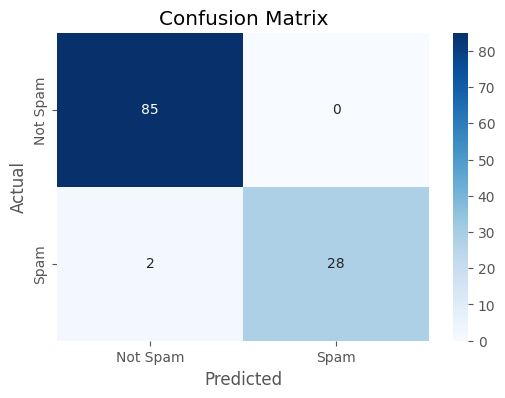


Sample Text:
Congratulations! You've won a $1000 gift card!

Text Prediction: SPAM

Audio File:
Hello. You are the winner of a free iPhone prize.
Click on the link below to receive your prize within 10 minutes before the deal ends.
Audio Prediction: SPAM


In [ ]:
# Core Libraries
import pandas as pd #for handling and processing structured tabular data
import re #for text cleaning using regular expressions (Non-ML Algorithm)
import nltk #stopword removal (Non-ML Algorithm)
from nltk.corpus import stopwords

# Machine Learning
from sklearn.model_selection import train_test_split #For splitting data into training and test sets (Non-ML Algorithm)
from sklearn.feature_extraction.text import TfidfVectorizer # Convert text to numeric features using TF-IDF (Non-ML Algorithm)
from sklearn.naive_bayes import MultinomialNB # Naive Bayes classifier for text classification
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score,
                             confusion_matrix,
                             classification_report) # Metrics to evaluate model performance

# Visualization
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For enhanced plotting with better aesthetics

# External Models
import whisper # Load OpenAI Whisper for audio transcription

# Configuration
nltk.download('stopwords') # Download stopwords if not already present
pd.set_option('display.max_colwidth', 100) # Increase max width for displaying text columns in DataFrames
plt.style.use('ggplot') # Set matplotlib plot style
sns.set_palette("husl") # Set seaborn color palette

# ==================== Data Pipeline ====================
def load_and_preprocess_data(file_path, sample_frac=1.0, random_state=42): """Load and preprocess email data."""

    # Load and sample data
    df = pd.read_csv(file_path).sample(frac=sample_frac, random_state=random_state)

    # Text preprocessing pipeline
    df['text'] = (
        df['text']
        .str.lower() #lowercase
        .apply(lambda x: re.sub(r'[^\w\s]', '', x))  # Remove punctuation
        .apply(lambda x: ' '.join(
            [word for word in x.split()
             if word not in stopwords.words('english')]))  # Remove stopwords
    )

    return df # cleaned DataFrame

# ==================== Training Pipeline ====================
def train_model(X_train, y_train): """Train and return Naive Bayes classifier."""

    model = MultinomialNB(alpha=0.03) # Create classifier with smoothing
    model.fit(X_train, y_train) # Train model on training data
    return model # trained model

def evaluate_model(model, X_test, y_test): """Evaluate model performance."""

    y_pred = model.predict(X_test) # Get predictions

    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred)
    } # metrics as a dictionary

# ==================== Visualization ====================
def plot_class_distribution(df, target_col='spam'): """Visualize class distribution."""

    class_dist = df[target_col].value_counts(normalize=True) * 100
    plt.figure(figsize=(8, 6))
    plt.pie(class_dist,
            labels=['Not Spam', 'Spam'],
            autopct='%1.1f%%',
            startangle=90,
            colors=['#4CAF50', '#F44336'],
            wedgeprops={'edgecolor': 'black'})
    plt.title('Class Distribution')
    plt.show()

def plot_confusion_matrix(y_true, y_pred): """ y_true: True labels , y_pred: Predicted labels   """

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Spam', 'Spam'],
                yticklabels=['Not Spam', 'Spam'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# ==================== Inference Pipeline ====================
class SpamClassifier: """End-to-end spam classification system."""

    def __init__(self, model, vectorizer, asr_model='medium'): """model: Trained classifier, vectorizer: Fitted TF-IDF vectorizer, asr_model: Whisper model size"""

        self.model = model # Store trained model
        self.vectorizer = vectorizer # Store TF-IDF vectorizer
        self.asr_model = whisper.load_model(asr_model) if asr_model else None # Load Whisper model for audio

    def predict_text(self, text):
        """Classify text input."""
        text_clean = self._preprocess_text(text)
        vectorized = self.vectorizer.transform([text_clean])
        return self.model.predict(vectorized)[0]

    def predict_audio(self, audio_path):
        """Classify audio file using ASR."""
        if not self.asr_model:
            raise ValueError("Whisper model not loaded")

        result = self.asr_model.transcribe(audio_path) # Transcribe audio
        return self.predict_text(result['text']) # Classify transcribed text

    def _preprocess_text(self, text):
        """Internal text preprocessing"""
        return ' '.join([word for word in
                        re.sub(r'[^\w\s]', '', text.lower()).split()
                        if word not in stopwords.words('english')])

# ==================== Main Execution ====================
if __name__ == "__main__":
    # Phase 1: Data Preparation
    data = load_and_preprocess_data(
        '/content/emails.csv',
        sample_frac=0.1  # Use 10% data for testing
    )
    plot_class_distribution(data)

    # Phase 2: Training
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(data['text']) # Convert text to TF-IDF
    y = data['spam'] # Labels

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Train and evaluate model
    nb_model = train_model(X_train, y_train)
    metrics = evaluate_model(nb_model, X_test, y_test)

    print("\nModel Performance:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1']:.4f}")
    plot_confusion_matrix(y_test, nb_model.predict(X_test))

    # Phase 3: Inference System
    classifier = SpamClassifier(nb_model, vectorizer)

    # Example text prediction
    sample_text = "Congratulations! You've won a $1000 gift card!"
    print("\nSample Text:")
    print(sample_text)
    print(f"\nText Prediction: {'SPAM' if classifier.predict_text(sample_text) else 'NOT SPAM'}")

    # Example audio prediction
    audio_pred = classifier.predict_audio("/content/WhatsApp Audio 2025-04-18 at 4.33.50 PM (1).mp4") #Put your audio file here
    print("\nAudio File:")
    with open('/content/spam.txt', 'r') as file:
            print(file.read())
    print(f"Audio Prediction: {'SPAM' if audio_pred else 'NOT SPAM'}")

In [ ]:
# Save model and TF-IDF for use in the interface

import pickle # for model saving

# model Naive Bayes
with open("model_nb.pkl", "wb") as f:
    pickle.dump(nb_model, f)

# TF-IDF
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)
